In [79]:
# Однажды (Скоро) я это пойму... XD

In [80]:
# %matplotlib
import time
import numpy as np
import scipy as sc
import sympy as sy
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [81]:
lmd = 0.1 # Шаг сходимости
N = 20 # число итераций
xx = 0 # стартовое значение
eps = 1e-6

def f(x):
    return x * x - 5 * x + 5

def df(x):
    return 2 * x - 5

x_plt = np.arange(1, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
f_plt = [f(x) for x in  x_plt] # для визуализации

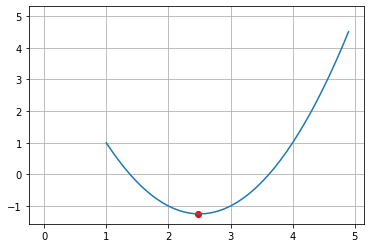

In [82]:
plt.ion() # включение интерактивного режиа отображения графиков
fig, ax = plt.subplots() # Создания окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt, f_plt) # Отображение параболы
point = ax.scatter(xx, f(xx), c='red') # отображение точки красным цветом

for i in range(N):
    xx = xx - lmd * df(xx) # Изменение аргумента на текущей итерации
    point.set_offsets([xx, f(xx)]) # отображение нового положения точки
    
    # перерисовкаграфика и задержка на 20мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)

In [83]:
plt.ioff()
print(xx)
ax.scatter(xx, f(xx), c='blue')
plt.show()

2.471176962384829


In [84]:
# Задание формул символьным типом (при помощи sympy)
x0,x1,z1,a = sy.symbols('x0 x1 z1 a')
fns1 = 2 * x0**2 + x0*x1 - x1**2
fns1

2*x0**2 + x0*x1 - x1**2

In [85]:
# Функция Розенброка при а = 100
# f(x,y) = -a(y - x^2)^2 - (1 - x)^2, при x,y [-2,2]
fns2 = -a*(x1 - x0**2)**2 - (1 - x0)**2
sy.simplify(fns2)
fns2

-a*(-x0**2 + x1)**2 - (1 - x0)**2

In [86]:
# Решение по примеру с практического урока
f = lambda x: x[0]**2 + x[1]**2 # функция
df = lambda x: np.array([2*x[0], 2*x[1]]) # частные производные

In [87]:
def gradientDescentWithHistory(f, df, z0, lr: float = 0.1, eps: float = 1e-06):
    history = [z0]
    while True:
        z0 = z0 - lr * df(z0)
        history.append(z0)
        
        norm = np.linalg.norm(df(z0))
#         print(norm, eps, " ---> ", df, ", ", z0)
        if np.linalg.norm(df(z0)) < eps:
            break
    return np.array(history)

def gradientDescentBestValue(f, df, z0, lr: float = 0.1, eps: float = 1e-06):
    while True:
        z0 = z0 - lr * df(z0)
        if np.linalg.norm(df(z0)) < eps:
            break
    return z0

In [88]:
# x_plt = np.arange(1, 5, 0.1) # диапазон изменения аргумента (от 0 до 5, с шагом 0.1)
z_start = np.array([10,20]) # два числа 100 и 50

In [89]:
z_start

array([10, 20])

In [90]:
grads = gradientDescentWithHistory(f, df, z_start)
best = grads[len(grads) - 1]

In [91]:
f(gradientDescentBestValue(f, df, z_start))

2.4388660549343715e-13

In [92]:
f(best)

2.4388660549343715e-13

In [93]:
# Пробуем отрисовать график результатов в 3D

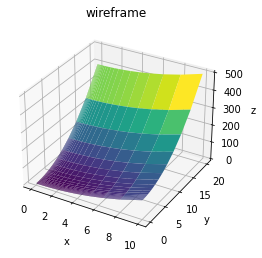

In [94]:
x = grads[:, 0]
y = grads[:, 1]

X, Y = np.meshgrid(x, y)
Z = f([X,Y])

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_wireframe(X, Y, Z, color='black')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('wireframe');

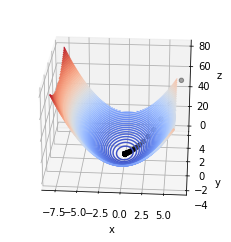

In [95]:
history = gradientDescentWithHistory(f, df, z_start)

# Data
X = np.linspace(-8, 6, 200)
Y = np.linspace(-4, 4, 200)

X, Y = np.meshgrid(X, Y)
Z = f([X,Y])

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

nx = history[-75:, 0]
ny = history[-75:, 1]
nz = []

for idx,val in enumerate(nx):
#     print(nx[idx], ny[idx], f([nx[idx], ny[idx]]))
    nz.append(f([nx[idx], ny[idx]]))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 80, cmap=cm.coolwarm)
# ax.scatter(best[0], best[1], f(best), c='black') # отображение точки красным цветом
ax.scatter(ny, nx, nz, c='black') # отображение точки красным цветом
ax.view_init(25, -86)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [96]:
# print(history)

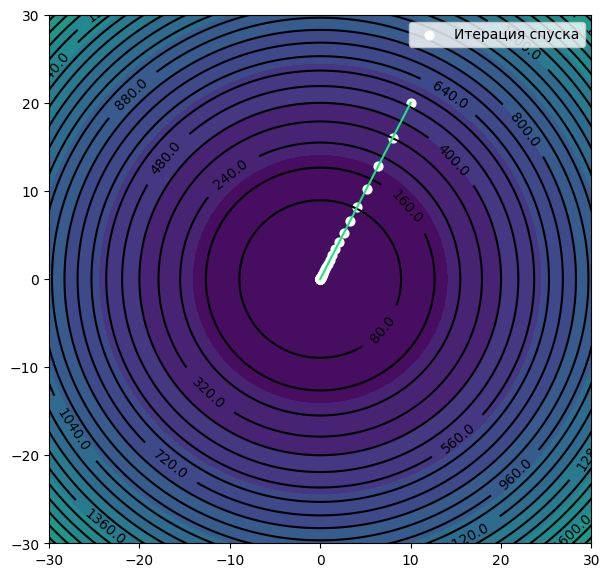

In [97]:
# Визуализация через линии уровня

XX = history.T[0]
YY = history.T[1]
ZZ = np.zeros((len(y), len(x)), dtype=np.double)

fig, ax = plt.subplots(figsize=(7, 7), dpi=100)

xline = np.linspace(-40.0, 40.0, 700)
yline = np.linspace(-40.0, 40.0, 700)

x1, x2 = np.meshgrid(xline, yline)

obj = x1**2 + x2**2

ax.contourf(*np.meshgrid(xline, yline), obj, levels=15)

CS = ax.contour(*np.meshgrid(xline, yline), obj,
                levels = 15,
                colors=[(0, 0, 0)] * 15)
ax.clabel(CS, fmt="%2.1f", use_clabeltext=True)


ax.scatter(XX, YY, c='w', s=40, label="Итерация спуска",)
ax.plot(XX, YY, c=(0.1,0.9,0.5))

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

plt.legend()
plt.show()

In [98]:
# Пробуем использовать pytorch
import torch

In [99]:
x = torch.ones(2,2, dtype=torch.float16)

In [100]:
x = torch.rand(3, requires_grad=True)
y = torch.rand(3)

In [101]:
x, y

(tensor([0.1120, 0.9824, 0.8940], requires_grad=True),
 tensor([0.8715, 0.9785, 0.4133]))

In [102]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    optimizer = torch.optim.SDG

    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

AttributeError: module 'torch.optim' has no attribute 'SDG'